Начинаю свою работу по парсингу данных с циана через библиотеку cianparser 
Указываю локацию парсинга 
Указываю страницы с которыз нужно будет парсить и задержку для парсинга 
После чего сохранаю всё в файл cian_data.csv 

In [21]:
#Импортируем библиотеки
import cianparser
import pandas as pd
import time

#Ставим локацию москва
moscow = cianparser.CianParser(location='Москва')

#Парсим данные с 1 по 2 страницу с задержкой 7 секунд 
data = []
for i in range(1, 2):
    a = moscow.get_flats(deal_type='sale', rooms=(1), additional_settings={'start_page': i, 'end_page':i} )
    data.extend(a)
    time.sleep(7)

exel_export = pd.DataFrame(data)
columns = ['author', 'author_type', 'url', 'location', 'deal_type', 'accommodation_type', 'floor', 'floors_count', 'rooms_count', 'total_meters', 'price', 'year_of_construction', 'object_type', 'have_loggia', 'parking_type', 'house_material_type', 'heating_type', 'finish_type', 'living_meters', 'kitchen_meters', 'phone', 'ceiling_height', 'district', 'street', 'house_number', 'underground', 'residential_complex'] #Название всех столбцов
selected_columns = exel_export[columns]
selected_columns.to_csv('cian_parsing.csv', mode='a', header=False, index=False)


                              Preparing to collect information from pages..
The page from which the collection of information begins: 
 https://cian.ru/cat.php?engine_version=2&p=1&with_neighbors=0&region=1&deal_type=sale&offer_type=flat&room1=1

 1 | 1 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 28. Progress ratio: 100 %. Average price: 278 502 073 rub

The collection of information from the pages with list of offers is completed
Total number of parsed offers: 28. 


In [3]:
import pandas as pd

Делаю вывод всей таблицы со всеми данными 

In [4]:
df = pd.read_csv("cian_data.csv")
df

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6853,Гринвуд Девелопмент,developer,https://krym.cian.ru/sale/flat/301789092/,Пересвет,sale,flat,11,13,1,40.0,...,Без отделки,-1,"5,1 м²",78633035124,3 м,Алушта,Набережная,18,NaN,Апарт-отель AURA
6854,Этажи Москва,real_estate_agent,https://www.cian.ru/sale/flat/307080220/,Пересвет,sale,flat,14,25,1,39.5,...,-1,-1,"19,6 м²",79099976193,"2,68 м",NaN,Саларьевская,9,Саларьево,NaN
6855,Владимир Абрамян,realtor,https://kaliningrad.cian.ru/sale/flat/308526777/,Пересвет,sale,flat,1,4,1,43.6,...,-1,17 м²,19 м²,79673519527,"2,8 м",Светлогорск,Зеленая,1А,NaN,Легенда Светлогорска
6856,Этажи Москва,real_estate_agent,https://www.cian.ru/sale/flat/306951695/,Пересвет,sale,flat,11,17,1,39.0,...,-1,19 м²,"7,3 м²",79645664257,-1,Ховрино,Зеленоградская,17К5,Грачёвская,NaN


Делаю вывод всех пропусков по каждому стобцу
И всю информацию о них 
Вижу что всего 6859 записей было сделано 
Замечаю что в столбцах 
street - 5425
house_number - 5779
district - 2985 записей всего без учёта пропусков 

In [5]:
#проверяем количество пропусков в каждом столбце,тип столбцов
#Всего 6859 записей
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6858 entries, 0 to 6857
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                6559 non-null   object 
 1   author_type           6562 non-null   object 
 2   url                   6858 non-null   object 
 3   location              6858 non-null   object 
 4   deal_type             6858 non-null   object 
 5   accommodation_type    6858 non-null   object 
 6   floor                 6858 non-null   int64  
 7   floors_count          6858 non-null   int64  
 8   rooms_count           6858 non-null   int64  
 9   total_meters          6858 non-null   float64
 10  price                 6845 non-null   float64
 11  year_of_construction  6858 non-null   object 
 12  object_type           6858 non-null   object 
 13  have_loggia           6858 non-null   object 
 14  parking_type          6858 non-null   object 
 15  house_material_type  

Решаю сделать вывод подсчта пропусков по каждому столбцу, а так же вывести процент пропусков 

In [6]:
# Подсчет пропусков по каждому столбцу
missing_values = df.isnull().sum()
print("Пропуски в данных:\n", missing_values)

# Процент пропусков в каждом столбце
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nПроцент пропусков в каждом столбце:\n", missing_percent)

Пропуски в данных:
 author                   299
author_type              296
url                        0
location                   0
deal_type                  0
accommodation_type         0
floor                      0
floors_count               0
rooms_count                0
total_meters               0
price                     13
year_of_construction       0
object_type                0
have_loggia                0
parking_type               0
house_material_type        0
heating_type               0
finish_type                0
living_meters              0
kitchen_meters             0
phone                      0
ceiling_height             0
district                3874
street                  1434
house_number            1080
underground             2259
residential_complex     3414
dtype: int64

Процент пропусков в каждом столбце:
 author                   4.359872
author_type              4.316127
url                      0.000000
location                 0.000000
deal_type 

Решаю дропнуть ненужныекак по мне столбцы по типу: номер телефона, автора, ссылки на объявление

In [7]:
df.drop(["author", "deal_type", "author_type", "phone", "accommodation_type", "heating_type", "url", "finish_type", "district", "underground"], axis=1, inplace=True) #Удаляеи ненужные столбцы
df

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,house_material_type,living_meters,kitchen_meters,ceiling_height,street,house_number,residential_complex
0,Серпухов,6,6,1,20.7,2350000.0,1917,Вторичка,-1,Наземная,-1,18 м²,1 м²,3 м,Крюкова,4,NaN
1,Серпухов,1,9,1,33.0,4150000.0,1975,Вторичка,-1,-1,-1,18 м²,6 м²,"2,7 м",Ворошилова,144,NaN
2,Серпухов,4,4,1,14.0,1700000.0,-1,Вторичка,-1,-1,-1,-1,-1,-1,Красный Текстильщик,2,NaN
3,Серпухов,5,5,1,17.5,2500000.0,1968,Вторичка,-1,-1,-1,-1,-1,-1,Российская,40,NaN
4,Серпухов,4,7,1,25.9,3000000.0,2009,Вторичка,-1,Наземная,-1,20 м²,5 м²,"3,5 м",Химиков,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6853,Пересвет,11,13,1,40.0,12400000.0,2025,Новостройка / Апартаменты,1 лоджия,-1,-1,-1,"5,1 м²",3 м,Набережная,18,Апарт-отель AURA
6854,Пересвет,14,25,1,39.5,12500000.0,2021,Вторичка,-1,-1,-1,-1,"19,6 м²","2,68 м",Саларьевская,9,NaN
6855,Пересвет,1,4,1,43.6,12644000.0,2019,Вторичка / Апартаменты,-1,Наземная,-1,17 м²,19 м²,"2,8 м",Зеленая,1А,Легенда Светлогорска
6856,Пересвет,11,17,1,39.0,13000000.0,1999,Вторичка,1 балкон,Наземная,-1,19 м²,"7,3 м²",-1,Зеленоградская,17К5,NaN


Делаю столбчатую диорграмму пропусков по всем столбцам 

In [5]:
import missingno as msno #Составляю столбчатую диоргамму пропусков 
import seaborn as sns
msno.bar(df)

ModuleNotFoundError: No module named 'missingno'

Решаю сделать дополнительно матрицу по пропускам чтобы понимать где их больше всего и есть ли какая-то закономерность
Вижу что в столбцах street, house_number, residential_complex огромное количество пропусков


<Axes: >

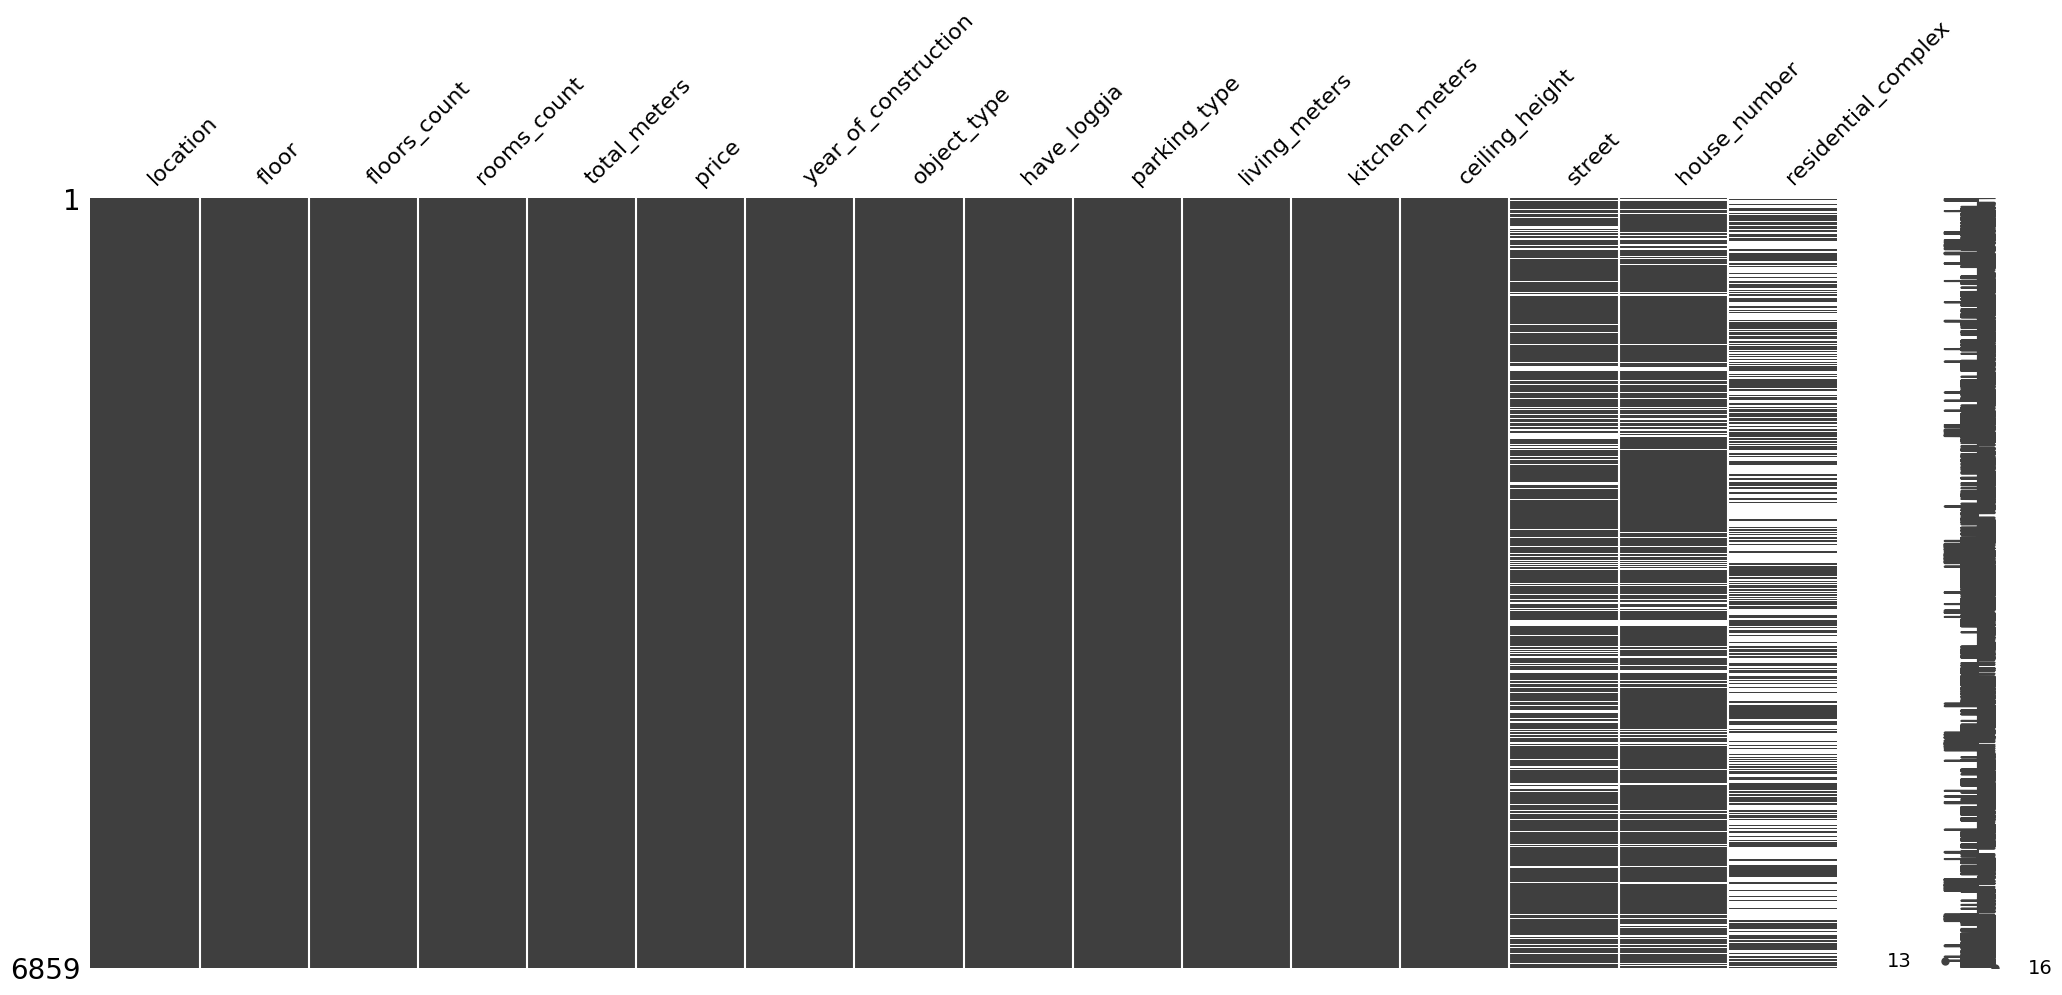

In [157]:
msno.matrix(df) #Строим матрицу, чтобы понимать где именно больше всего пропущенных значений. Другими словами, есть ли в пропусках какая-то закономерность или нет.

Делаю копию датасета 

Решаю заполнить пропуски 0 


In [8]:
fillna_const = df.copy() #вначале сделаем копию датасета

# заполним пропуски в столбцах нулями, передав методу .fillna() словарь,
# где ключами будут названия столбцов, а значениями - константы для заполнения пропусков
fillna_const.fillna({'price' : 0}, inplace = True)
fillna_const.fillna({'street' : 0}, inplace = True)
fillna_const.fillna({'house_number' : 0}, inplace = True)
fillna_const.fillna({'residential_complex' : 0}, inplace = True)

делаю вывод чтобы проверить остались ли пропуски в столбцах и вижу что их нету


In [9]:
#Проверяем остались ли пропуски в столбцах
fillna_const[['price', 'street', 'house_number', 'residential_complex']].isna().sum()

price                  0
street                 0
house_number           0
residential_complex    0
dtype: int64

Делаю сохранение всё в файл

In [10]:
fillna_const.to_csv("cian_data.csv", index=False) #Сохраняем

Решаю начать удаление дубликатов из файла cian_data с помощью .drop_duplicates 
После чего делаю сохранение файла


In [11]:
import pandas as pd  #Удаление дубликатов

data = pd.read_csv("cian_data.csv")
data = data.drop_duplicates()
data.to_csv("cian_data.csv", index=False)

Решаю создать новую переменную price_per_meter и сделать вывод в неё стоимости за квадратный метр 
После чего сохраняю всё в файл cian_data


In [12]:
import pandas as pd #Создаём новый столбец total_per_meter 

base = "cian_data.csv"
data = pd.read_csv(base)

def meters(row):
    return round(row["price"]/row["total_meters"])

data["price_per_meter"] = data.apply(meters, axis=1)
data.to_csv(base, index=False)

решаю дропнуть ещё пару не нужных как по мне столбцов 
После чего делаю вывод таблицы

In [22]:
df.drop(["living_meters", "kitchen_meters", "ceiling_height",], axis=1, inplace=True)
data.to_csv("cian_data", index=False)
df

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,house_material_type,street,house_number,residential_complex,price_per_meter
0,Серпухов,6,6,1,20.7,2350000.0,1917,Вторичка,Нету балкона,Наземная,Бетон,Крюкова,4,0,113527
1,Серпухов,1,9,1,33.0,4150000.0,1975,Вторичка,Нету балкона,У дома,Бетон,Ворошилова,144,0,125758
2,Серпухов,4,4,1,14.0,1700000.0,-1,Вторичка,Нету балкона,У дома,Бетон,Красный Текстильщик,2,0,121429
3,Серпухов,5,5,1,17.5,2500000.0,1968,Вторичка,Нету балкона,У дома,Бетон,Российская,40,0,142857
4,Серпухов,4,7,1,25.9,3000000.0,2009,Вторичка,Нету балкона,Наземная,Бетон,Химиков,8,0,115830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5428,Пересвет,11,13,1,40.0,12400000.0,2025,Новостройка / Апартаменты,1 лоджия,У дома,Бетон,Набережная,18,Апарт-отель AURA,310000
5429,Пересвет,14,25,1,39.5,12500000.0,2021,Вторичка,Нету балкона,У дома,Бетон,Саларьевская,9,0,316456
5430,Пересвет,1,4,1,43.6,12644000.0,2019,Вторичка / Апартаменты,Нету балкона,Наземная,Бетон,Зеленая,1А,Легенда Светлогорска,290000
5431,Пересвет,11,17,1,39.0,13000000.0,1999,Вторичка,1 балкон,Наземная,Бетон,Зеленоградская,17К5,0,333333


Решаю начать убирать значение "-1" из столбцов заменяя их на другие значения 

В столбце have_loggia я заменяю значение -1 на значение "Нету балкона"

В столбце parking_type я заменяю значение -1 на значение "У дома"

В столбце house_material_type я заменяю значение -1 на значение "Бетон"

В столбце year_of_construction я заменяю значение -1 на значение "Нету информации"

In [24]:
df.loc[df['have_loggia'] == '-1', 'have_loggia'] = 'Нету балкона' #делаю замену -1 на "Нету балкона"
df.loc[df['parking_type'] == '-1', 'parking_type'] = 'У дома' #делаю замну -1 на "У дома"
df.loc[df['house_material_type'] == '-1', 'house_material_type'] = 'Бетон'
df.loc[df['year_of_construction'] == '-1', 'year_of_construction'] = 'Нету информации'
df

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,house_material_type,street,house_number,residential_complex,price_per_meter
0,Серпухов,6,6,1,20.7,2350000.0,1917,Вторичка,Нету балкона,Наземная,Бетон,Крюкова,4,0,113527
1,Серпухов,1,9,1,33.0,4150000.0,1975,Вторичка,Нету балкона,У дома,Бетон,Ворошилова,144,0,125758
2,Серпухов,4,4,1,14.0,1700000.0,Нету информации,Вторичка,Нету балкона,У дома,Бетон,Красный Текстильщик,2,0,121429
3,Серпухов,5,5,1,17.5,2500000.0,1968,Вторичка,Нету балкона,У дома,Бетон,Российская,40,0,142857
4,Серпухов,4,7,1,25.9,3000000.0,2009,Вторичка,Нету балкона,Наземная,Бетон,Химиков,8,0,115830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5428,Пересвет,11,13,1,40.0,12400000.0,2025,Новостройка / Апартаменты,1 лоджия,У дома,Бетон,Набережная,18,Апарт-отель AURA,310000
5429,Пересвет,14,25,1,39.5,12500000.0,2021,Вторичка,Нету балкона,У дома,Бетон,Саларьевская,9,0,316456
5430,Пересвет,1,4,1,43.6,12644000.0,2019,Вторичка / Апартаменты,Нету балкона,Наземная,Бетон,Зеленая,1А,Легенда Светлогорска,290000
5431,Пересвет,11,17,1,39.0,13000000.0,1999,Вторичка,1 балкон,Наземная,Бетон,Зеленоградская,17К5,0,333333


Решаю наxчать с поиска выбросов в файле cian_data.csv 
Q1 - Это значение, которое делит нижние 25% данных от верхних 75%. Другими словами, это значение, ниже которого находится 25% всех наблюдений. 
Q3 - Это значение, которое делит нижние 75% данных от верхних 25%. Это значит, что 75% наблюдений находятся ниже этого значения
IQR - Это мера распространенности данных, которая определяется как разница между Q3 и Q1

После чего делаю отсеивание отбросов из столбца price_per_meter

In [14]:
import pandas as pd #Импортирую бибилиотеки
import matplotlib.pyplot as plt
import numpy as np

#Начинаю поиск выбросов 
path_base = "cian_data.csv"

df = pd.read_csv(path_base)

# Вычисление границ IQR
Q1, Q3 = df['price_per_meter'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR  

# Отсеивание выбросов
df_cleaned = df[(df['price_per_meter'] >= lower_bound) & (df['price_per_meter'] <= upper_bound)]

df_cleaned.to_csv(path_base, index=False, encoding='utf-8-sig')

Решаю начать делать вывод графиков 

Первым моим графиком становиться график зависимости цены от площади 

In [20]:
import pandas as pd

path_base = "cian_data.csv"

df = pd.read_csv(path_base)
df.describe()

# Строим график зависомости цены от площади 
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df, x='total_meters', y='price_per_meter')
plt.title('Зависимость цены от площади')
plt.xlabel('Площадь (м²)')
plt.ylabel('Цена')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1500x500 with 0 Axes>

Решаю сделать график взоимосвязи между данными и ценой за квадрат 

Первый мой график это взаимосвязь между этажом и ценой за квадрат 

Второй график это взаимосвязь количества этажей и ценой за квадрат 

Третий график это взаимосвязь количества комнат в квартире и ценой за квадрат 

Четвёртый график это взаимосвязь общей площади квартиры и ценой за квадрат 



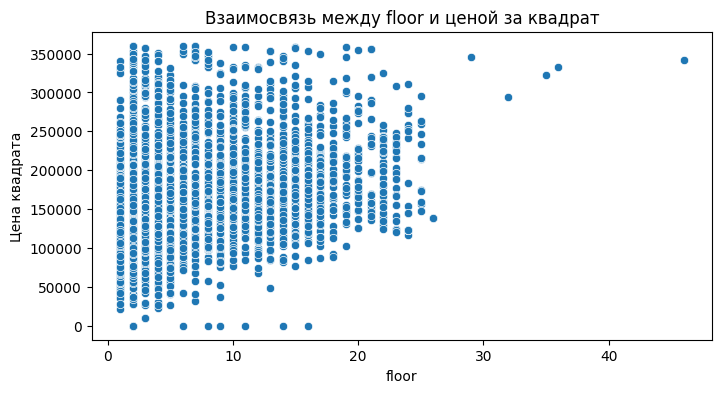

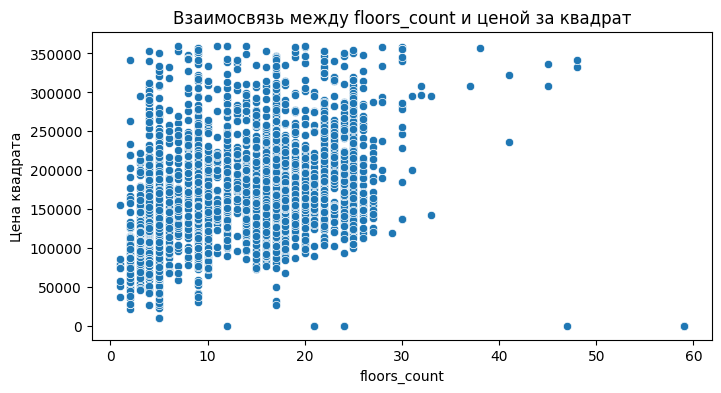

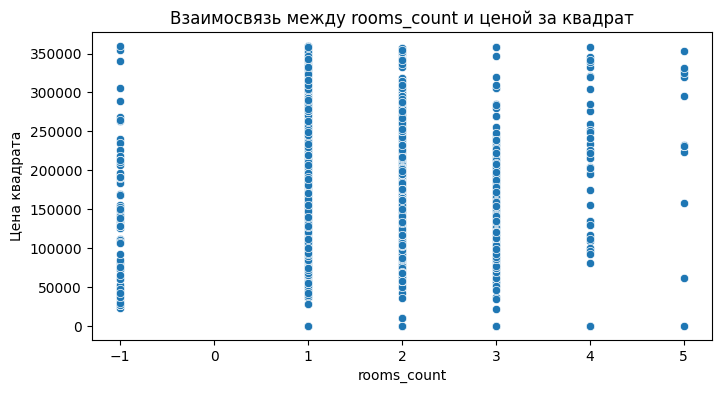

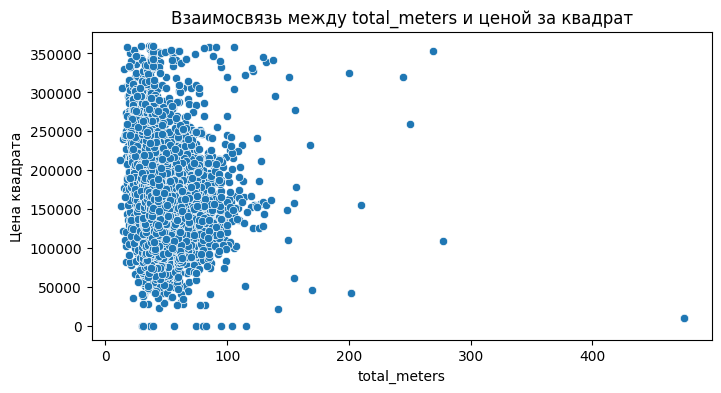

In [168]:
import matplotlib.pyplot as plt #Импортируем библиотеки 
import seaborn as sns
import pandas as pd

path_base = "cian_data.csv"
df = pd.read_csv(path_base)

columns_to_plot = ['floor','floors_count','rooms_count','total_meters'] 

#Строим графики взаимосвязи
#1 график взаимосвязь между этажом и ценой за квадрат
#2 график взаимосвязи количества этажей и ценой за квадрат 
#3 график взаимосвязи количества комнат и ценой за квадрат 
#4 график взаимосвязи общей площади квартиры и цены за квадрат 
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=column, y='price_per_meter')
    plt.title(f'Взаимосвязь между {column} и ценой за квадрат')
    plt.xlabel(column)
    plt.ylabel('Цена квадрата')
    plt.show()